# Assignment 2 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Dimensionality Reduction`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified. Libraries allowed (Numpy, matplotlib)

## Datasets 
- The IIIT-CFW is database for the cartoon faces in the wild. The dataset contains 8928 annotated cartoon faces of famous personalities of the world with varying profession. Additional 1000 real faces of the public figure to study cross modal retrieval tasks, such as, Photo2Cartoon retrieval. Ref - https://cvit.iiit.ac.in/research/projects/cvit-projects/cartoonfaces
- We have sub sampled the following data for this assignment - Cartoon faces of 8 subjects and approx. 100 images for each subject. 

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q3.ipynb`.

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
# Installing Pillow Libraries
!pip install scikit-learn matplotlib Pillow

In [60]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image

## Load Data

In [61]:
cfw_dict = {
    'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7
}

opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

In [62]:
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

def display_images(imgs,classes,row=1,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

def load_data(dir_path):
    image_list = []
    y_list = []
    label_dict = cfw_dict
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    image_list = np.array(image_list)
    y_list = np.array(y_list)
    print("Dataset shape:",image_list.shape)
    print("Label shape:",y_list.shape)

    return image_list,y_list

In [63]:
dirpath = './IIIT-CFW'
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


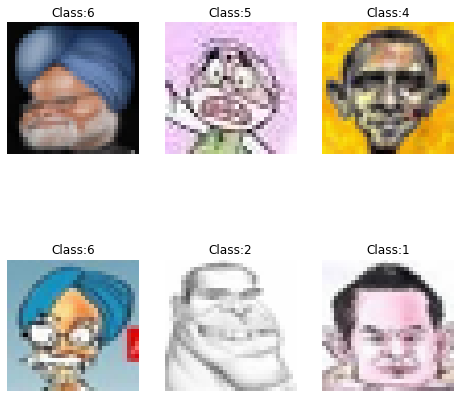

In [64]:
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

ind = np.random.randint(0,y.shape[0],6)
display_images(X[ind,...],y[ind], row=2,col=3)

## Dimensionality Reduction
- Plot eigen spectrum for the data.

Percentage of variance preserved is defined as the fraction of eigen values used. As we include more principal components to describe the data, the percentage of variances preserved under the dimensionality reduction increases. 

- Plot the percentage of variances vs the number of principal components to validate the above statement.
- Try visualizing these eigen vectors. Comment on what these ghost faces represent 
- Try reconstructing images with your choice of number of principal components and visualize the reconstructed image.

Let's define reconstruction error as the frobenius norm of the difference between original and reconstructed image. 

- Plot the number of principal components vs the corresponding reconstruction error for 5 selected number of principal components of your choice.
- Using the two dominant principal values, plot the data with colors showing the labels. What do you observe?


In [65]:
# X[0].shape

In [66]:
X_mine=[]
for i in range(X.shape[0]):
    X_mine.append(list(X[i].flatten()))
X_new=np.array(X_mine)

In [67]:
# X_new.shape

#### Write a function that gives eigen values and eigen vectors given data

In [68]:
# write function

In [69]:
from numpy.linalg import eig

In [70]:
def calc_eigens(my_mat):
    my_mat=np.array(my_mat)
    cov_mat=np.cov(my_mat.T)
    ev,evect=eig(cov_mat)
    evect=evect.real
    return ev,evect

In [71]:
Eigen_val,Eigen_vect=calc_eigens(X_mine)

In [72]:
# Eigen_val

In [73]:
# Eigen_vect

#### Compute eigen values and plot eigen value spectrum

In [74]:
# eigen values and spectrum

In [75]:
eigen_val_list=[]
eigen_val_sum=[]
temp_sum=0
for i in range(Eigen_val.shape[0]):
    eigen_val_list.append(Eigen_val[i].real)
    temp_sum=Eigen_val[i].real+temp_sum
    eigen_val_sum.append(temp_sum)

In [76]:
# eigen_val_sum

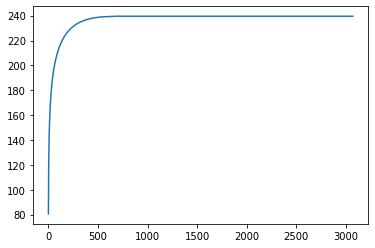

In [77]:
plt.plot(eigen_val_sum)
plt.show()

#### Plot the percentage of variances vs the number of principal components

In [78]:
# plot variance vs components

In [79]:
perc_of_variances=[]
tot_sum=eigen_val_sum[-1]
for i in range(len(eigen_val_sum)):
    perc_of_variances.append(eigen_val_sum[i]/tot_sum)

In [80]:
# perc_of_variances

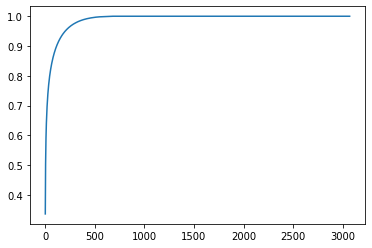

In [81]:
plt.plot(perc_of_variances)
plt.show()

#### Visualize eigen faces(eigen vectors)

In [82]:
# Eigen_vect[0]

In [83]:
rgb_weights = np.array([0.2989, 0.5870, 0.1140])

In [84]:
def visualise_eigen_face(arr):
    arr_3d = arr.reshape((32,32,3))
    grayscale_image = np.dot(arr_3d[...,:3], rgb_weights)
#     print(grayscale_image.shape)
    return grayscale_image

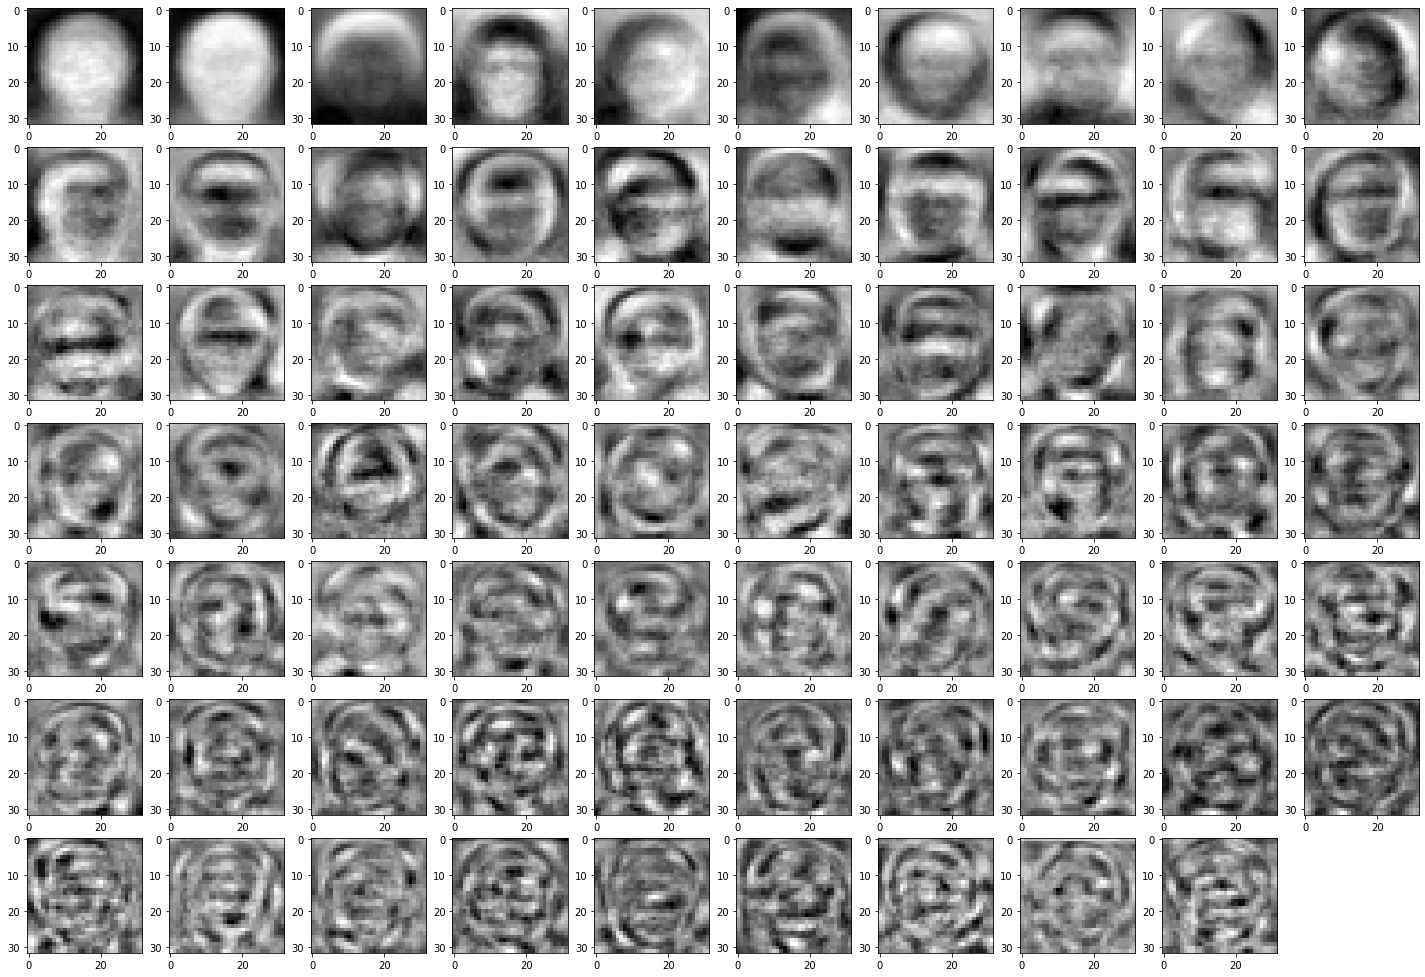

In [85]:
k=69
Eigen_Vectors=Eigen_vect.T
plt.figure(figsize=(25,25))
for i in range(k):
#     print(Eigen_Vectors.shape)
    gray_image=visualise_eigen_face(Eigen_Vectors[i])
    plt.subplot(10,10,i+1)
    plt.imshow(gray_image,cmap=plt.get_cmap("gray"))
plt.show()

#### Reconstruction 

In [86]:
# reconstruction

In [87]:
X_new.shape

(672, 3072)

In [88]:
def find_pca_num():
    idx=0
    for element in perc_of_variances:
        if element>=0.90:
            break
        idx=idx+1
    return idx

In [89]:
def find_pca_num_each_class(eigen_val_arr):
  ret_list=[]
  t_list=[]
  t_sum=0
  for i in range(eigen_val_arr.shape[0]):
    t_sum=eigen_val_arr[i].real+t_sum
    t_list.append(t_sum)
  ovr_sum=t_list[-1]
  for i in range(eigen_val_arr.shape[0]):
    ret_list.append(t_list[i]/ovr_sum)
  idx=0
  for element in ret_list:
    if element>=0.90:
      break
    idx=idx+1
  return idx

In [90]:
# dim_red_mat.shape

In [91]:
def reconstruction():
    index=find_pca_num()
#     print(index)
    dim_red_mat=Eigen_vect[:,:index]
    intr_mat=np.dot(X_new,dim_red_mat)
#     print(res_mat.shape)
    res_mat=np.dot(intr_mat,dim_red_mat.T)
#     print(res_mat.shape)
    return res_mat
    
    

In [92]:
eig_vecs=reconstruction()

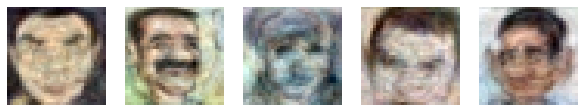

In [93]:
"""
Use the below sample code to visualize the eigen faces and reconstructed images (can write your own function as well)

"""
def plot(image,H,W,C,indices):
    #indices = [randrange(100)+1 for i in range(5)]
    pl = np.reshape(image,(-1,H,W,C))
    plt.figure(figsize=(25,25))
    for c,i in enumerate(indices):
        ele = pl[i]
        minim = np.min(ele)
        maxim = np.max(ele)
        ele = (ele - minim) / (maxim - minim)
        ele = np.clip(ele,0,254)
        plt.subplot(1,12,c+1)
        plt.axis('off')
        plt.imshow(ele,cmap=plt.cm.gray)
    plt.show()

indices = [randrange(12)+1 for i in range(5)]
plot(eig_vecs,H,W,C, indices)


#### Plot data in 2D

In [94]:
# plot data in 2D

In [95]:
from sklearn.decomposition import PCA

In [96]:
pca = PCA(n_components=2)
pca.fit(X_new)
y_val=pca.transform(X_new)

In [97]:
pca2 = PCA(n_components=2)
pca2.fit(eig_vecs)
y_val1=pca2.transform(eig_vecs)

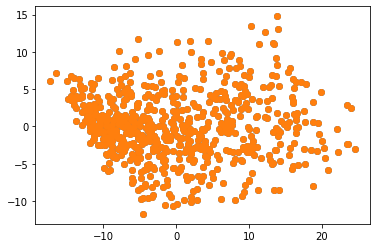

In [98]:
plt.scatter(y_val[:,0],y_val[:,1])
plt.scatter(y_val1[:,0],y_val1[:,1])
plt.show()

## Lets analyze the principal components classwise
- Visualize dominant eigen faces of each of the classes.
- Print the number of principal components required to retain 90% variance for each of the classes and for the entire dataset
- Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

Example output:
```
Number of principal components required for 90% reconstruction of the:
Entire Dataset = 10 
Amitabhbachan = 10
AamirKhan = 10
...
```

In [99]:
# Load data again
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


In [100]:
X_reshape=[]
for i in range(X.shape[0]):
    X_reshape.append(list(X[i].flatten()))
X_now=np.array(X_reshape)

In [101]:
X_now.shape[0]

672

In [102]:
my_dict={}
for i in range(X_now.shape[0]):
    chabi=y[i]
    val=X_reshape[i]
    if chabi not in my_dict.keys():
        my_dict[chabi]=[]
    my_dict[chabi].append(val)

#### Visualize dominant eigen faces of each of the classes

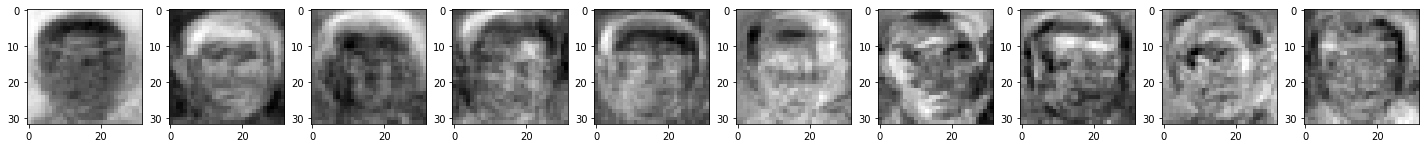

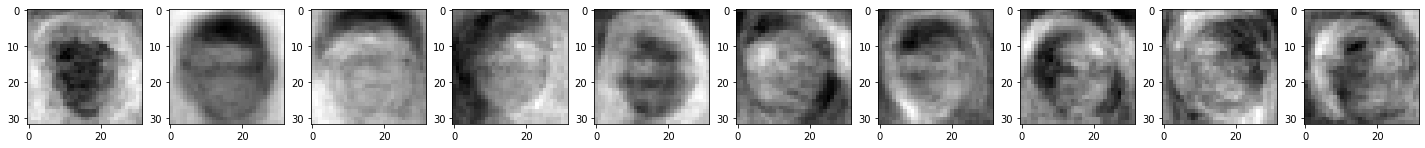

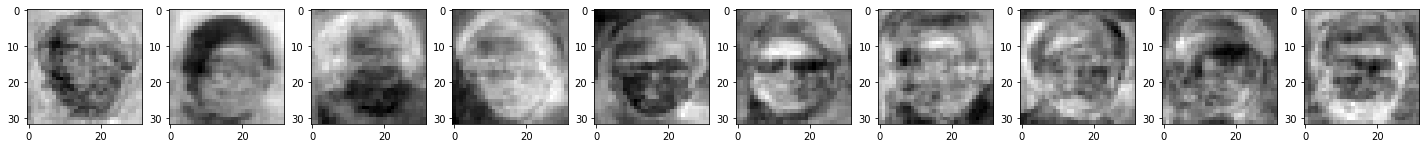

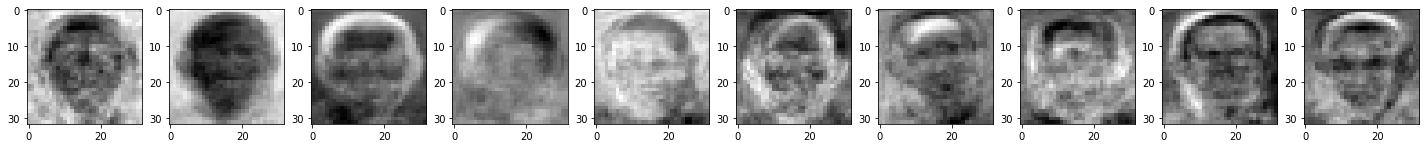

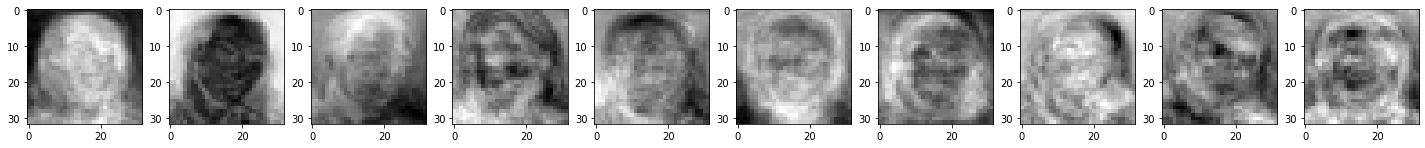

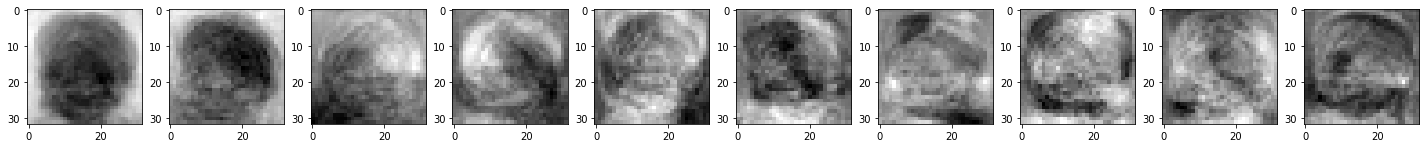

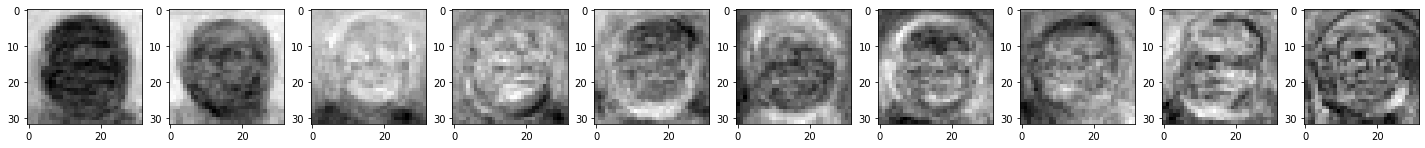

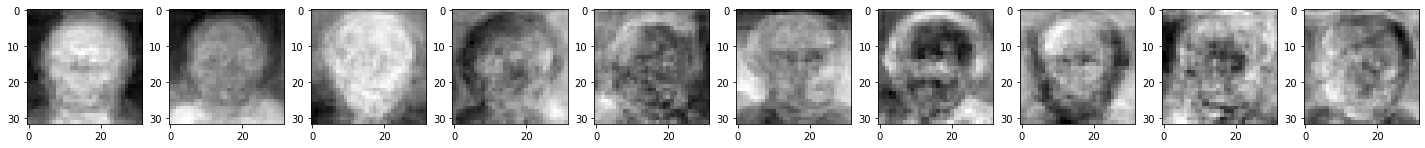

In [103]:
pca_num_each_class=[]
for keys,value in my_dict.items():
    new_eigen_value,new_eigen_vector=calc_eigens(value)
    num=10
    ev_trans=new_eigen_vector.T
    pca_num_each_class.append(find_pca_num_each_class(new_eigen_value))
    plt.figure(figsize=(25,25))
    for i in range(num):
        gray_image_new=visualise_eigen_face(ev_trans[i])
        plt.subplot(10,10,i+1)
        plt.imshow(gray_image_new,cmap=plt.get_cmap("gray"))
    plt.show()
    

#### Number of principal components required to retain 90% variance for each of the classes and for the entire dataset

In [104]:
print("Number of principal components required to retain 90% variance for the entire dataset", find_pca_num() )

Number of principal components required to retain 90% variance for the entire dataset 114


In [105]:
print("Number of principal components required to retain 90% variance for each of the classes")
for i in cfw_dict.keys():
  print("class",i,":",pca_num_each_class[cfw_dict[i]])

Number of principal components required to retain 90% variance for each of the classes
class Amitabhbachan : 23
class AamirKhan : 35
class DwayneJohnson : 20
class AishwaryaRai : 42
class BarackObama : 27
class NarendraModi : 49
class ManmohanSingh : 56
class VladimirPutin : 43


#### Analysis : Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

No, the number of components for entire dataset and each class will be different as for various classes and entire dataset we need different features to represent them. So it might be possible that a class can be represented by few features than other class.

## Linear Regression (continued)
1. Perform linear regression on below datapoints
2. Use PCA for dimensionality reduction on this datapoints and then perform Linear regression.
3. Perform this experiment on different number of components and report the score for linear regression. Plot the graph of [1-200] principal components vs regression score. What do you observe?

Note :- Can use inbuilt functions for Linear Regression and PCA for this question

In [106]:

from sklearn.linear_model import LinearRegression

In [107]:
# datapoints
X,_ = load_data(dirpath)
X = X.reshape((X.shape[0],-1))
label = np.array([randrange((32*32*3)) for i in range(5)])
label = np.mean(X[:,label], axis = 1)
print(label.shape)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)
(672,)


In [108]:
score=[]
for i in range(2,200):
    pca = PCA(n_components=i)
    pca.fit(X)
    y_val=pca.transform(X)
    reg = LinearRegression().fit(y_val,label)
    score.append(reg.score(y_val,label))

In [109]:
# code here

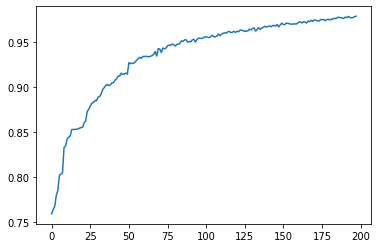

In [110]:
plt.plot(score)
plt.show()

The value of a perfect regression score is 1. The graph shows that as we increase the number of principal components, the value of regression score increase and we achieve the value of 0.95 regression score with approximately 150 components. 